In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [14]:
df = pd.read_csv("all_data.csv")
df.rename(columns={"Life expectancy at birth (years)" : "LEABY"}, inplace=True)
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


In [7]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


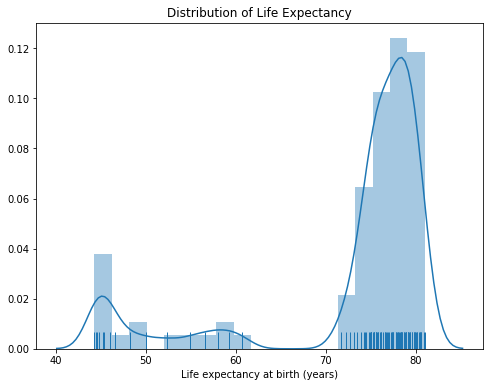

In [34]:
#Distribution of Life Expectancy
plt.figure(figsize=(8,6))
sns.distplot(df["LEABY"], rug=True, kde=True) #curve shows KDE(Kernel Density Estimation)
plt.xlabel("Life expectancy at birth (years)")
plt.title("Distribution of Life Expectancy")
plt.show()

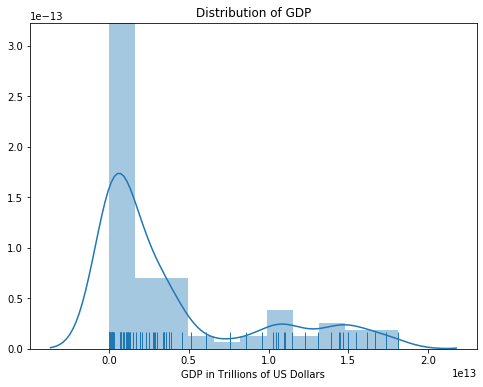

In [37]:
#Distribution of GDP
plt.figure(figsize=(8,6))
sns.distplot(df["GDP"], rug=True, kde=True) #curve shows KDE(Kernel Density Estimation)
plt.xlabel("GDP in Trillions of US Dollars")
plt.title("Distribution of GDP")
plt.show()

In [48]:
dfmean = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(dfmean)

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


In [92]:
#Has life expectancy increased over time in the six nations?
#Has GDP increased over time in the six nations?
#Is there a correlation between GDP and life expectancy of a country?
#What is the average life expectancy in these nations?
#What is the distribution of that life expectancy?

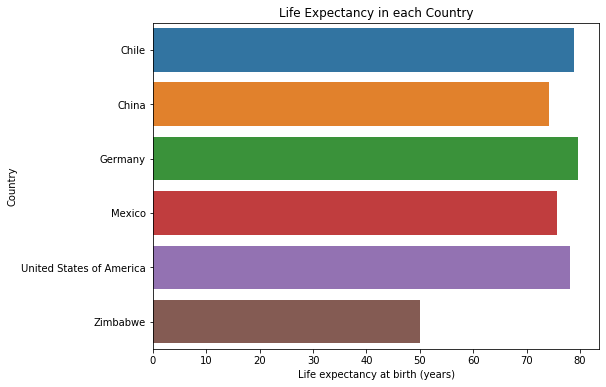

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfmean, x="LEABY", y="Country")
plt.title("Life Expectancy in each Country")
plt.xlabel("Life expectancy at birth (years)")
plt.show()

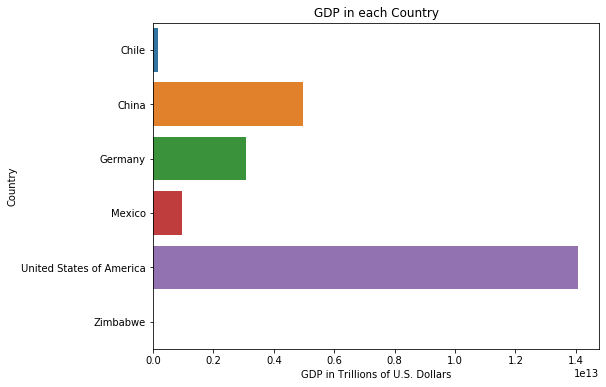

In [94]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfmean, x="GDP", y="Country")
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title("GDP in each Country")
plt.show()

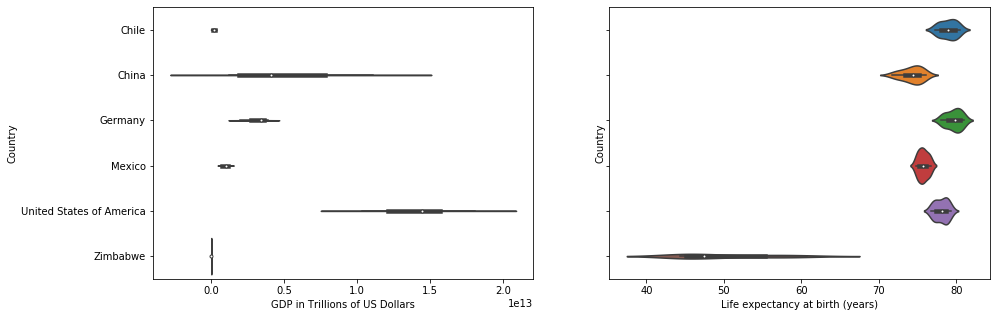

In [89]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.violinplot(ax=ax[0], data=df, x="GDP", y="Country")
ax[0].set_xlabel("GDP in Trillions of US Dollars")
ax[1] = sns.violinplot(ax=ax[1], data=df, x="LEABY", y="Country")
ax[1].set_xlabel("Life expectancy at birth (years)")

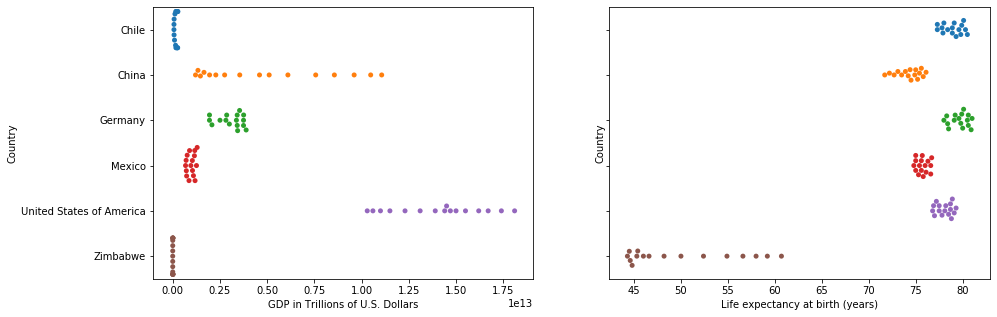

In [90]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.swarmplot(ax=ax[0], data=df, x="GDP", y="Country")
ax[0].set_xlabel("GDP in Trillions of U.S. Dollars")
ax[1] = sns.swarmplot(ax=ax[1], data=df, x="LEABY", y="Country")
ax[1].set_xlabel("Life expectancy at birth (years)")

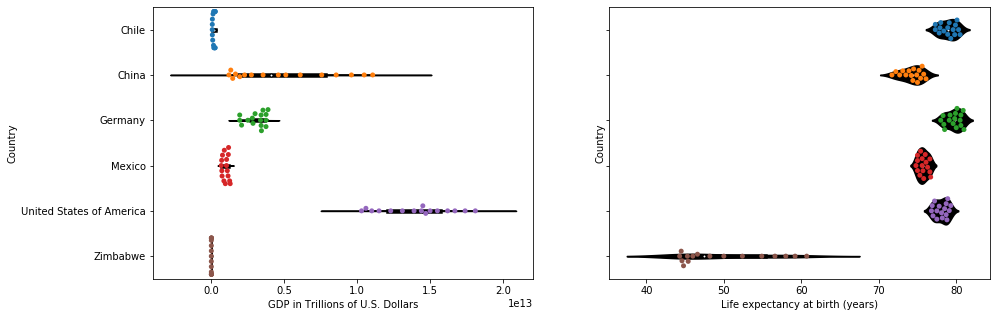

In [91]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.violinplot(ax=ax[0], data=df, x="GDP", y="Country", color = "black")
ax[0] = sns.swarmplot(ax=ax[0], data=df, x="GDP", y="Country")
ax[0].set_xlabel("GDP in Trillions of U.S. Dollars")
ax[1] = sns.violinplot(ax=ax[1], data=df, x="LEABY", y="Country", color = "black")
ax[1] = sns.swarmplot(ax=ax[1], data=df, x="LEABY", y="Country")
ax[1].set_xlabel("Life expectancy at birth (years)")

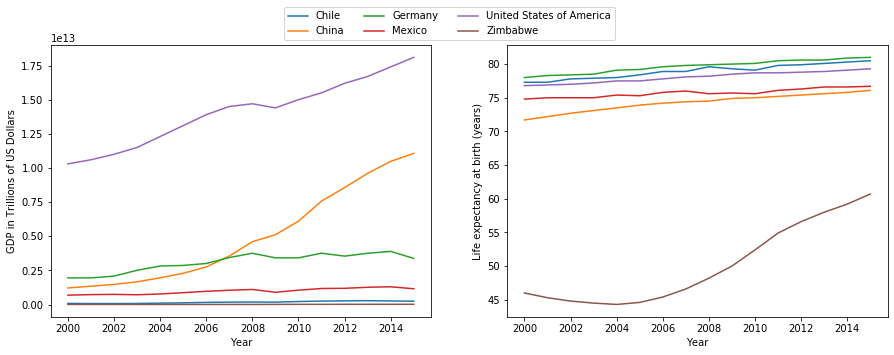

In [120]:
fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(1,2,1)
sns.lineplot(data=df, x="Year", y="GDP", hue="Country", legend=False)
plt.ylabel("GDP in Trillions of US Dollars")

ax2 = plt.subplot(1,2,2)
sns.lineplot(data=df, x="Year", y="LEABY", hue="Country")
plt.legend(labels=[i for i in df.Country.unique()],loc='lower left', bbox_to_anchor=(-0.6, 1, 1, 0.5), ncol=3)
plt.ylabel("Life expectancy at birth (years)")

plt.show()

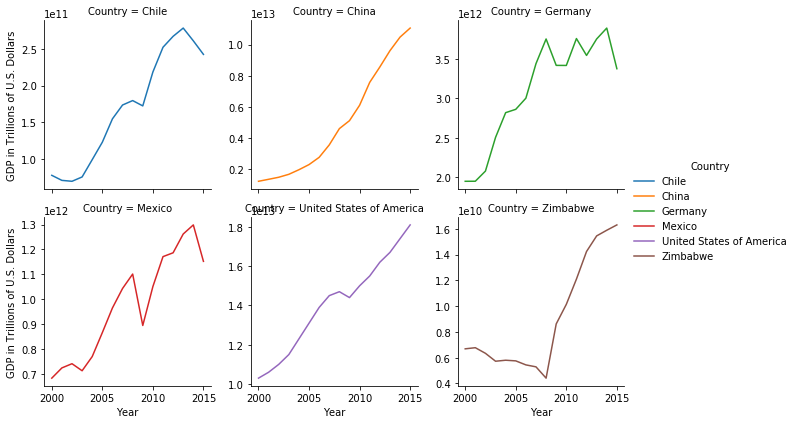

In [133]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)
graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

plt.show()

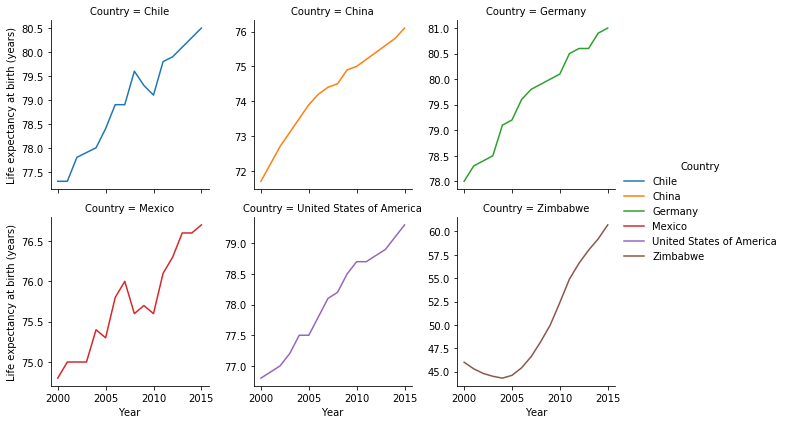

In [134]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)
graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend().set_axis_labels("Year","Life expectancy at birth (years)"))

plt.show()

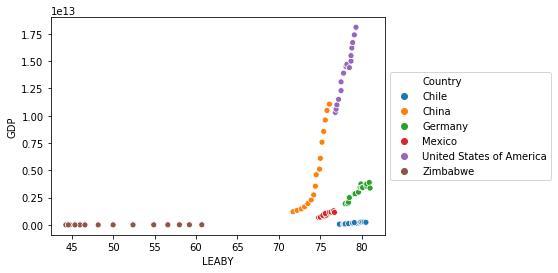

In [124]:
sns.scatterplot(data=df, x="LEABY", y="GDP", hue="Country")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

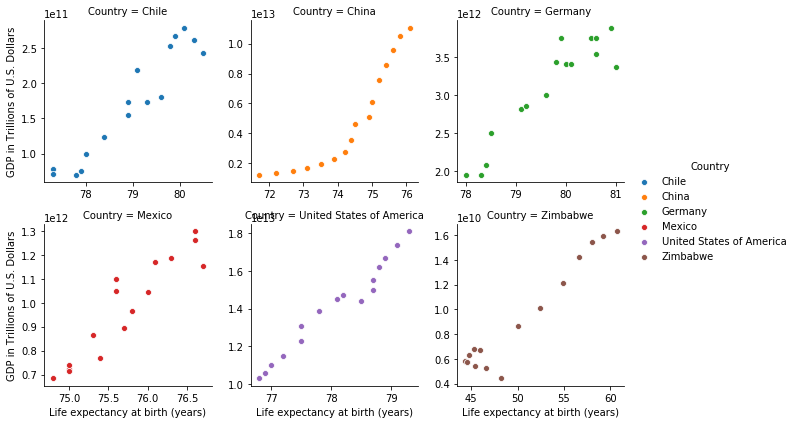

In [135]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend().set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
plt.show()